<a href="https://colab.research.google.com/github/MayMon-T3807/MMDT_2025_MLAI101/blob/mmdt_091/Lab1_GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gradient decenet method is a first order optimization algorithm used to find the maximum or minimum of a function. This method is a key foundation and commonly used in machine learning and deep learning techniques.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

df=pd.read_csv('/content/sample_data/Advertising.csv')

X=df[['TV', 'radio', 'newspaper']]
Y=df['sales'].values
X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

In [ ]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9



The first step of 'Gradient descent algorithm" is to define the starting points. In this tutorial, the starting points are defined randomly.

In [4]:
import random
import math
import numpy as np

def initialize(dim):
    random.seed(42)
    b=random.random()
    a=np.random.rand(dim)
    return b,a

Step 2 predicts the value of y using the parameters and compute the cost.

In [5]:
def predict_Y(b,a,X):
    return b + np.dot(X,a)

def get_cost(Y,Y_hat):
    Y_resd=Y-Y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd)

Step 3 computes the gradient which measures the change in all weights with regard to the change in error and update the parameters.

In [7]:

def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    theta_1=theta_o-learning_rate*dw
    return b_1,theta_1

Repeat Step 2 and step 3 till the changes in cost function values become very small or for the number of pre-defined iterations.

In [9]:
def run_gradient_descent(X,Y,alpha,num_iterations):
    tolerance = 1e-06
    b,theta=initialize(X.shape[1])
    w_list = ['weight_a' + str(d+1)for d in range(0,X.shape[1])]
    gd_iterations_df=pd.DataFrame(columns=['iteration','value_b'] +w_list +  ['cost'])
    result_idx=0
    prev_cost = 0
    for iter_num  in range(num_iterations):
        Y_hat=predict_Y(b,theta,X)
        print(b)
        this_cost=get_cost(Y,Y_hat)
        prev_b=b
        prev_theta=theta
        b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
        gd_iterations_df.loc[result_idx]=[iter_num,b] + theta.tolist() +[ this_cost]
        result_idx=result_idx+1
        if (np.abs(this_cost - prev_cost)<=tolerance):
            break
        prev_cost = this_cost

    return gd_iterations_df,b,theta

gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=400)

0.6394267984578837
0.9070882624887261
1.1693964972389517
1.4264585672941728
1.6783793959482893
1.9252618080293236
2.167206571868737
2.4043124404313625
2.636676191622735
2.8643926677902805
3.087554814434475
3.3062537181457854
3.5205786437828697
3.730617070907212
3.936454729489068
4.138175634899286
4.3358621222013
4.5295948797572745
4.719452982162129
4.905513922518886
5.087853644068509
5.266546571187138
5.441665639763396
5.613282326968128
5.781466680428766
5.94628734682019
6.107811599883786
6.2661053678861105
6.421233260528388
6.57325859531782
6.722243423411464
6.868248554943235
7.01133358384437
7.151556912167482
7.2889757739241325
7.4236462584456495
7.555623333276737
7.684960866611202
7.811711649278978
7.935927416293398
8.05765886796753
8.17695569060818
8.293866576796017
8.408439245260096
8.520720460354894
8.630756051147797
8.738590930124841
8.844269111522344
8.947833729291897
9.04932705470606
9.148790513611939
9.2462647033397
9.341789409272906
9.435403621087447
9.527145548665699
9.6170

Demonstrate how the cost changes based on the parameters.

[]

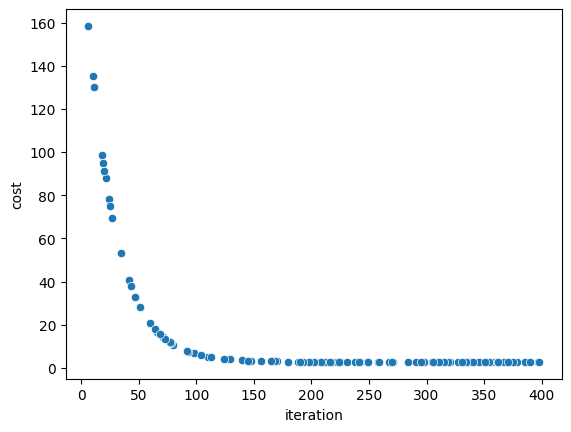

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(gd_iterations_df.sample(100), x = 'iteration', y = 'cost')
plt.plot()

In [11]:
tolerance = 1e-03  # Looser rule — will stop earlier


In [12]:
num_iterations = 1000


In [13]:
def run_gradient_descent(X, Y, alpha, num_iterations):
    tolerance = 1e-06
    b, theta = initialize(X.shape[1])
    w_list = ['weight_a' + str(d+1) for d in range(0, X.shape[1])]
    gd_iterations_df = pd.DataFrame(columns=['iteration', 'value_b'] + w_list + ['cost'])
    result_idx = 0
    prev_cost = 0

    for iter_num in range(num_iterations):
        Y_hat = predict_Y(b, theta, X)
        this_cost = get_cost(Y, Y_hat)
        print(f"Iteration {iter_num} - Cost: {this_cost}")

        prev_b = b
        prev_theta = theta
        b, theta = update_theta(X, Y, Y_hat, prev_b, prev_theta, alpha)

        gd_iterations_df.loc[result_idx] = [iter_num, b] + theta.tolist() + [this_cost]
        result_idx += 1

        if np.abs(this_cost - prev_cost) <= tolerance:
            break

        prev_cost = this_cost

    return gd_iterations_df, b, theta


In [14]:
gd_iterations_df, b, theta = run_gradient_descent(X, Y, alpha=0.01, num_iterations=400)


Iteration 0 - Cost: 203.84394671447964
Iteration 1 - Cost: 195.86295121132534
Iteration 2 - Cost: 188.2007161665292
Iteration 3 - Cost: 180.84442745555904
Iteration 4 - Cost: 173.78178991796693
Iteration 5 - Cost: 167.0010061515649
Iteration 6 - Cost: 160.49075618259604
Iteration 7 - Cost: 154.24017797523268
Iteration 8 - Cost: 148.23884874528994
Iteration 9 - Cost: 142.47676704453525
Iteration 10 - Cost: 136.94433558340472
Iteration 11 - Cost: 131.63234476129975
Iteration 12 - Cost: 126.53195687494555
Iteration 13 - Cost: 121.63469097654433
Iteration 14 - Cost: 116.93240835465049
Iteration 15 - Cost: 112.41729861184182
Iteration 16 - Cost: 108.081866314355
Iteration 17 - Cost: 103.91891818990345
Iteration 18 - Cost: 99.92155085089769
Iteration 19 - Cost: 96.08313902124985
Iteration 20 - Cost: 92.3973242458619
Iteration 21 - Cost: 88.85800406277926
Iteration 22 - Cost: 85.45932161883029
Iteration 23 - Cost: 82.19565571038102
Iteration 24 - Cost: 79.06161123160518
Iteration 25 - Cost: 7

In [ ]:
gd_iterations_df_high_lr, b_high, theta_high = run_gradient_descent(X, Y, alpha=0.1, num_iterations=400)


Iteration 0 - Cost: 198.13109658941426
Iteration 1 - Cost: 127.84825580536011
Iteration 2 - Cost: 82.93287976156844
Iteration 3 - Cost: 54.20025411921808
Iteration 4 - Cost: 35.80236729360562
Iteration 5 - Cost: 24.01102431338604
Iteration 6 - Cost: 16.446812521800858
Iteration 7 - Cost: 11.58964213089358
Iteration 8 - Cost: 8.467531973436522
Iteration 9 - Cost: 6.458456072942072
Iteration 10 - Cost: 5.16402718572237
Iteration 11 - Cost: 4.328890910574812
Iteration 12 - Cost: 3.7892421778711878
Iteration 13 - Cost: 3.4399156616991204
Iteration 14 - Cost: 3.2133334992182325
Iteration 15 - Cost: 3.0660287642821062
Iteration 16 - Cost: 2.970012739780051
Iteration 17 - Cost: 2.9072413208192738
Iteration 18 - Cost: 2.8660655467909235
Iteration 19 - Cost: 2.8389531967897335
Iteration 20 - Cost: 2.821025148103829
Iteration 21 - Cost: 2.8091143352090033
Iteration 22 - Cost: 2.8011601359472786
Iteration 23 - Cost: 2.7958182047217885
Iteration 24 - Cost: 2.7922087990662425
Iteration 25 - Cost: 2

In [ ]:
gd_iterations_df_low_lr, b_low, theta_low = run_gradient_descent(X, Y, alpha=0.0001, num_iterations=400)


Iteration 0 - Cost: 200.39766179517267
Iteration 1 - Cost: 200.31863823135598
Iteration 2 - Cost: 200.23964641844228
Iteration 3 - Cost: 200.16068634361235
Iteration 4 - Cost: 200.08175799405225
Iteration 5 - Cost: 200.00286135695313
Iteration 6 - Cost: 199.92399641951158
Iteration 7 - Cost: 199.84516316892913
Iteration 8 - Cost: 199.76636159241264
Iteration 9 - Cost: 199.68759167717428
Iteration 10 - Cost: 199.608853410431
Iteration 11 - Cost: 199.5301467794054
Iteration 12 - Cost: 199.4514717713251
Iteration 13 - Cost: 199.37282837342275
Iteration 14 - Cost: 199.29421657293634
Iteration 15 - Cost: 199.2156363571091
Iteration 16 - Cost: 199.13708771318932
Iteration 17 - Cost: 199.05857062843054
Iteration 18 - Cost: 198.9800850900913
Iteration 19 - Cost: 198.9016310854355
Iteration 20 - Cost: 198.82320860173226
Iteration 21 - Cost: 198.74481762625567
Iteration 22 - Cost: 198.66645814628507
Iteration 23 - Cost: 198.58813014910504
Iteration 24 - Cost: 198.50983362200523
Iteration 25 - Co

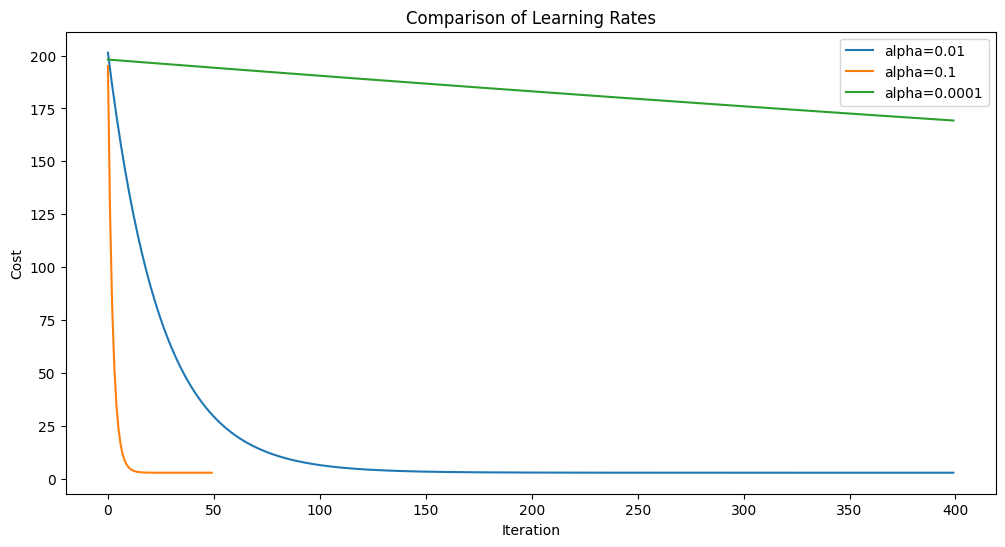

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=gd_iterations_df, x='iteration', y='cost', label='alpha=0.01')
sns.lineplot(data=gd_iterations_df_high_lr, x='iteration', y='cost', label='alpha=0.1')
sns.lineplot(data=gd_iterations_df_low_lr, x='iteration', y='cost', label='alpha=0.0001')
plt.title("Comparison of Learning Rates")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()
